In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
df=pd.read_csv("full_patient_dataset.csv")

In [57]:
print(df.shape)

(308854, 19)


In [58]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,0,0,No,0,0,1,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,1,0,No,0,1,0,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,0,0,No,0,1,0,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,1,0,No,0,1,0,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,0,0,No,0,0,0,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [60]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(),inplace=True)

In [61]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna("Unknown",inplace=True)

In [62]:
if "Weight_(kg)" in df.columns and "Height_(cm)" in df.columns:
    df['Helight_m']=df["Height_(cm)"]/100
    df["BMI_Calc"]=df["Weight_(kg)"]/ (df["Height_(cm)"]**2)

In [63]:
target="Diabetes"
features=[col for col in df.columns if col!=target]

df_encoded=pd.get_dummies(df[features],drop_first=True)

In [64]:
X=df_encoded
y=df[target]

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)
y_pred_lr=log_reg.predict(X_test)

print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("confusion_matrix:\n ",confusion_matrix(y_test,y_pred_lr))
print("classification_report:\n",classification_report(y_test,y_pred_lr))

Logistic Regression
Accuracy:  0.8742128183128005
confusion_matrix:
  [[53046   783]
 [ 6987   955]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     53829
           1       0.55      0.12      0.20      7942

    accuracy                           0.87     61771
   macro avg       0.72      0.55      0.56     61771
weighted avg       0.84      0.87      0.84     61771



c:\Users\satis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
tree= DecisionTreeClassifier(max_depth=5,random_state=42)
tree.fit(X_train,y_train)
y_pred_tree=tree.predict(X_test)

print("Decision Tree")
print("Accuracy: ", accuracy_score(y_test,y_pred_tree))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred_tree))
print("Classification_report:\n",classification_report(y_test,y_pred_tree))

Decision Tree
Accuracy:  0.8733871881627301
Confusion_matrix:
 [[53498   331]
 [ 7490   452]]
Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     53829
           1       0.58      0.06      0.10      7942

    accuracy                           0.87     61771
   macro avg       0.73      0.53      0.52     61771
weighted avg       0.84      0.87      0.83     61771



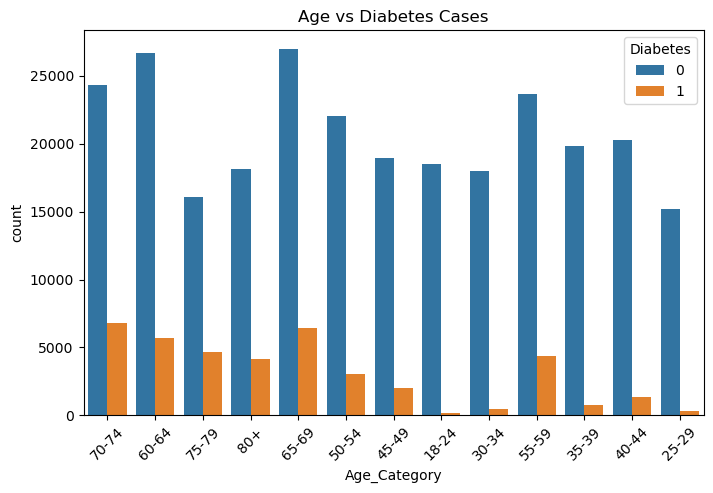

In [69]:
if "Age_Category" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x="Age_Category",hue="Diabetes")
    plt.title("Age vs Diabetes Cases")
    plt.xticks(rotation=45)
    plt.show()

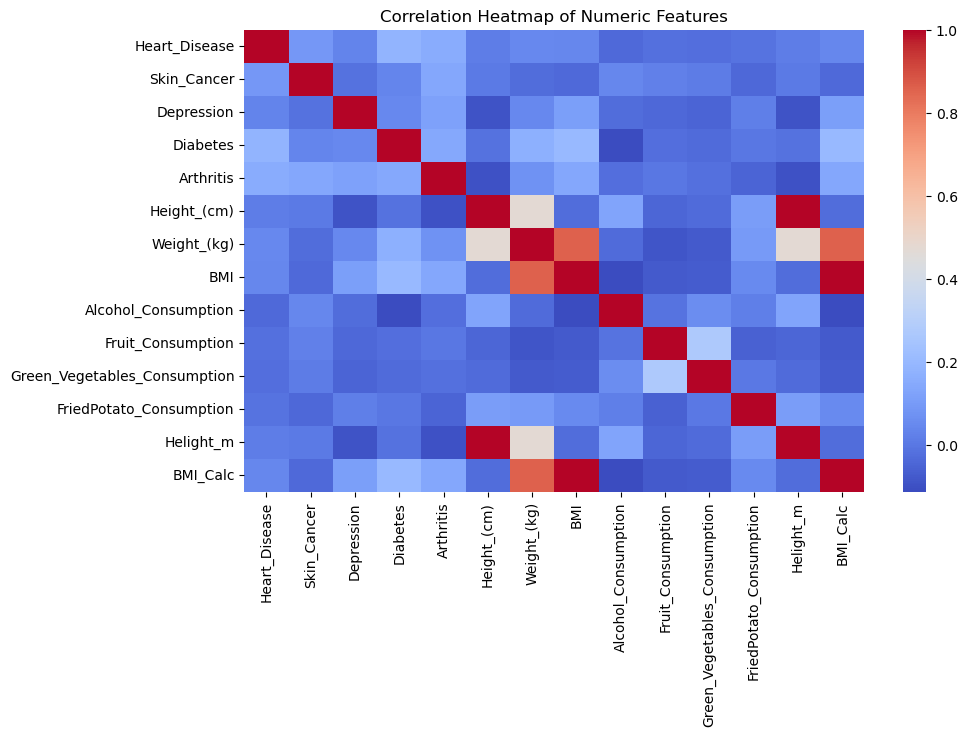

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()